# **Density-based spatial clustering (DBSCAN)**

DBSCAN documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

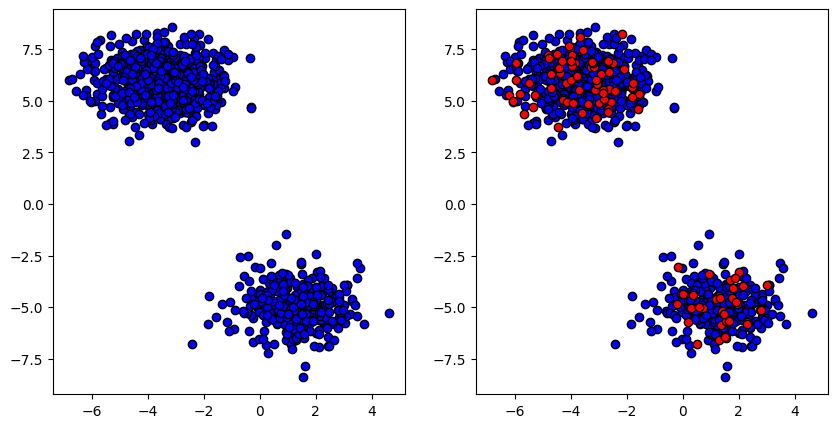

In [12]:
X, _ = make_blobs(n_samples = 1000, n_features = 2, random_state=69)

# Train test splits
X_train, X_test = train_test_split(X, test_size=0.1,random_state=1)
_, axes = plt.subplots(1,2,figsize = (10,5))

axes[0].scatter(X[:,0],X[:,1], c='b', edgecolors='k')
axes[1].scatter(X_train[:,0],X_train[:,1], c='b', edgecolors='k')
axes[1].scatter(X_test[:,0],X_test[:,1], c='r', edgecolors='k')
plt.show()

In [55]:
dbscan = DBSCAN(eps= 1, min_samples= 5 )

# Train DBSCAN
dbscan.fit(X_train)

DBSCAN(eps=1)

In [56]:
# Predictions
predictions = dbscan.fit_predict(X_test)
print(np.unique(predictions,return_counts=True))

(array([-1,  0,  1]), array([ 3, 65, 32]))


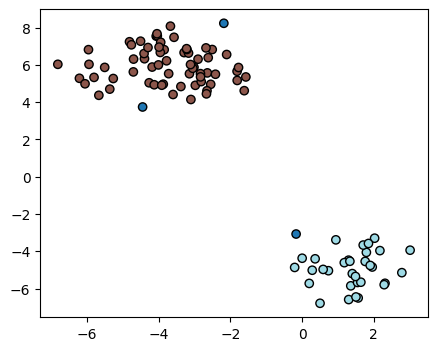

In [57]:
_, ax = plt.subplots(figsize = (5,4))
ax.scatter( X_test[:,0] , X_test[:,1] , c=predictions,cmap='tab20', edgecolors='k')

# **DBSCAN on real data**

Download the fruits data [here](https://drive.google.com/file/d/1M8tiAWDZclABJN1Meq9oEHCLJTNyHdpP/view?usp=share_link)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [ ]:
_


plt.scatter( _ , _ )
print (X.shape, y.shape)

In [ ]:
dbscan = DBSCAN(eps= _ , min_samples= _ )
dbscan.fit( _ )

In [ ]:
predictions = _

In [ ]:
# Plot
_

# **DBSCAN on images**

Use any of the following images:
 - [image1.jpeg](https://drive.google.com/file/d/1ehjQbNbSLTPOdnzZf5mtcokH-Irb9Hsq/view?usp=sharing)
 - [image2.png](https://drive.google.com/file/d/1RxivIbgi2eAG6p1myuxQGJs2zhGEsH_4/view?usp=sharing)
 - [image3.jpg](https://drive.google.com/file/d/1Pc_C9B_vqIxkLFV90RWSlRxRcTN-yKqF/view?usp=sharing)

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from sklearn.cluster import DBSCAN

(447, 763, 3)


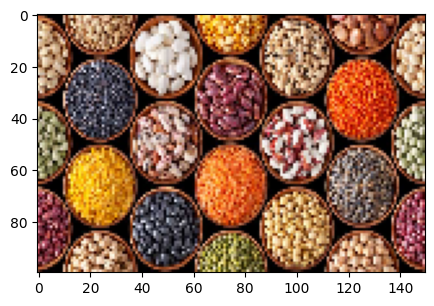

In [91]:
original_image = cv2.imread('image3.jpg')
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
print(original_image.shape)

original_image = cv2.resize(original_image,(150,100))
img_hsv = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)

_, ax = plt.subplots(figsize=(5,4))
ax.imshow(original_image)

In [92]:
vectorized_hsv = img_hsv[:,:,0].reshape(-1,1)

In [163]:
eps = abs(img_hsv[:,:,0].min()-img_hsv[:,:,0].max())*0.02
min_samples = int(len(vectorized_hsv)*0.03)

<ipython-input-163-b962c6f3e282>:1: RuntimeWarning: overflow encountered in scalar subtract
  eps = abs(img_hsv[:,:,0].min()-img_hsv[:,:,0].max())*0.02


In [164]:
dbscan = DBSCAN(eps = eps, min_samples=min_samples)
predictions = dbscan.fit_predict(vectorized_hsv)

In [165]:
print(np.unique(predictions))

[-1  0  1  2]


In [166]:
predictions = predictions.reshape(original_image.shape[:2])

_, axes = plt.subplots(1,2, figsize=(200,100))
axes[0].imshow(original_image), axes[0].set_axis_off(),axes[0].set_title('Original image')
axes[1].imshow(predictions, cmap='tab20'), axes[1].set_axis_off(),axes[1].set_title('Segmented image')

(<matplotlib.image.AxesImage at 0x7b1e8ec3d390>,
 None,
 Text(0.5, 1.0, 'Segmented image'))